# Linear Regression 

Begin by importing all necessary modules

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import random
from scipy import optimize 

mpl.style.available
mpl.style.use('ggplot') 

%matplotlib inline 

Load the Linear Regression Dataset into a pandas data frame

In [2]:
#make sure all data sets used are saved in the same directory as this notebook
df = pd.read_csv('LinRegDataset.csv')


Have a quick look at the data

In [3]:
df.head()

,X,Y
0,0.000000,220.295906
1,45.454545,288.020807
2,90.909091,101.357841
3,136.363636,194.852504
4,181.818182,103.587866


Plot the data on a scatter plot

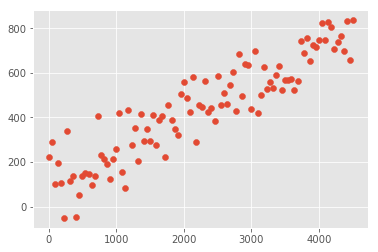

In [4]:
plt.scatter(df.X,df.Y)
plt.show()

Define a Linear Function :
$$f = \theta_0 + \theta_1 x$$

In [5]:
def LinFunc(x,theta0,theta1):
    f = theta0 + theta1*x
    return f

Having looked at a plot of the data, have a go at guessing what the intercept and gradient of a line of best fit would be ($\theta_{0}$ and $\theta_{1}$ respectively) and superimpose this line onto the scatter plot

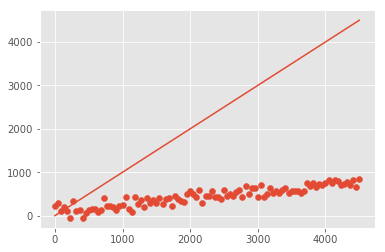

In [6]:
#change these two numbers to your buest guess of the intercept and gradient
theta0 = 1
theta1 = 1
df['Ypredicted'] = LinFunc(df.X,theta0,theta1)

plt.scatter(df.X,df.Y)
plt.plot(df.X,df.Ypredicted)
plt.show()

##Getting to the optimal answer:
###Cost Function

Define cost function:
$C =  \Sigma_{i=1}^{N} (y_{pred}^i - y_{obs}^i)^2$

In [7]:
def CostFunction(x_obs,y_obs,theta0,theta1):
    if len(y_obs) != len(x_obs):
        print "Must Provide a 1 to 1 dataset to the cost function"
    cost = 0
    for i in range(0,len(y_obs)):
        y_pred = LinFunc(x_obs[i],theta0,theta1)
        cost += (y_pred-y_obs[i])**2
    return cost

In the next cell, we calculate the cost function for a wide range of values of $\theta_{0}$ and $\theta_{1}$

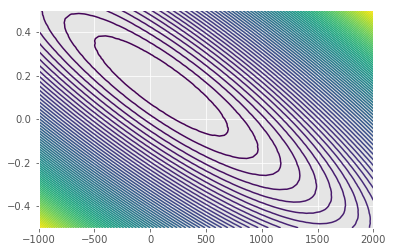

In [8]:
def plotCost(df,ax):
    plotvec = []
    #break the region [-1000,2000] into 50 evenly spaced intervals
    for theta_0 in np.linspace(-1000,2000, 51):
        #break the region [-0.5,0.5] into 50 evenly spaced intervals
        for theta_1 in np.linspace(-0.5,0.5,51):
            plotvec.append([theta_0, theta_1, CostFunction(df.X, df.Y, theta_0, theta_1)])
            
    plotvec = np.array(plotvec)
    ax.tricontour(plotvec[:,0], plotvec[:,1], plotvec[:,2],80)

ax = plt.axes()
plotCost(df, ax)

# Optimisation
Scipi's optimize module uses the Nelder-Mead algorithm (by default) for optimising a function of multiple variables. For more information on the inner workings of the Nelder-Mead algorithm, see https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method. 

This particular method minimises a function, which is great for minimising a cost function, but bear in mind that if you wish to maximise a function, just create a wrapper function which multiplies the function of interest's output my -1. 

The general syntax (after importing the optimize module), is:

`optimize.fmin(function name, starting guess, (other kwargs))`

This does however make the assumption that that your function only takes one argument or rather that if it takes multiple arguments, they are passed to it in vector form. Currently, the cost function takes the data set in question as well as $\theta_{0}$ and $\theta_{1}$ as inputs. Thus it is necessary to write a wrapper function.



In [9]:
def wrapper_func(theta):
    return(CostFunction(df.X, df.Y, theta[0], theta[1]))

Now we simply "optimize" the wrapper function. As with most numerical algorithms, we need to give it an initial guess. Use your best guesses from above when you were trying to impose a line onto your data set by eyeballing the data, or pick values based on the contour plot above.

In [10]:
optim=optimize.fmin(wrapper_func,[theta0,theta1])
print optim

Optimization terminated successfully.
         Current function value: 815134.624925
         Iterations: 81
         Function evaluations: 158
[ 99.10465384   0.15246501]


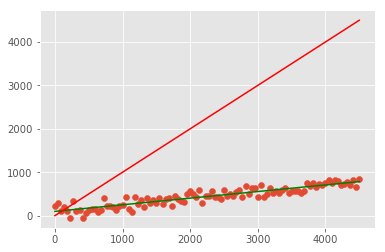

In [11]:
opimised_prediction = LinFunc(df.X,optim[0],optim[1])

plt.scatter(df.X, df.Y)
plt.plot(df.X, opimised_prediction, c='g')
plt.plot(df.X, df.Ypredicted, c='r')
plt.show()

The green line shows the optimised prediction and the red, your most recent "guessed" prediction.

#Polynomial Regression
Consider the following toy data which we would like to fit a function to

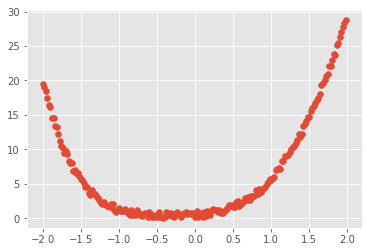

In [12]:
new_data = []
new_data = np.load("regression_test_data.npy",new_data)
plt.scatter(new_data[:,0],new_data[:,1])
plt.show()

Clearly it is possible to fit a line which minimises the error, but this is still a poor fit, as is demonstrated in the next cell.

      fun: 8910.463945806563
 hess_inv: array([[  2.50018812e-03,   1.87493989e-05],
       [  1.87493989e-05,   1.87504984e-03]])
      jac: array([ 0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([ 6.45316862,  2.62335492])


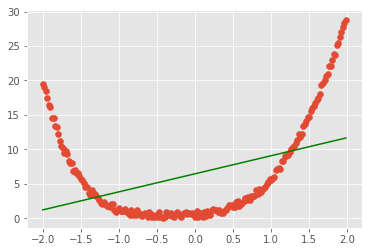

In [13]:
def new_wrapper_func(theta):
    return CostFunction(new_data[:,0],new_data[:,1],theta[0],theta[1])
optim = optimize.minimize(new_wrapper_func,[1,1])
print optim

prediction = LinFunc(new_data[:,0], optim['x'][0], optim['x'][1])

plt.scatter(new_data[:,0],new_data[:,1])
plt.plot(new_data[:,0],prediction,c='g')

plt.show()

Clearly the green line does not not describe the data we are provided with, but it is the best linear fit possible (to within numerical precision)

##Fitting Non-Linear Functions
In principle, we can simply stipulate that the function we would like to fit is a polynomial of order N, given by $f(x;\underline{\theta})$ in which $\theta_{k}$ is the coefficient of $x^{k}$ such that $f(x;\underline{\theta})=\Sigma_{k=0}^{K}\theta_{k}x^{k}$ for a polynomial of order K.

Consequently, the optimisation we must perform is in K-dimensions, but the cost function essentially still looks the same:

$C=\Sigma_{i=1}^{N}\left(f(x_{i};\underline{\theta})-y_{i}\right)^{2}$

Let's try to fit a $4^{th}$ order polynomial to our data:

      fun: 55.338407070591956
 hess_inv: array([[  8.79927648e-03,  -7.30435037e-05,  -1.02625627e-02,
          4.60032195e-05,   2.30896656e-03],
       [ -7.30435037e-05,   1.17492064e-02,   2.96469170e-04,
         -4.11466687e-03,  -1.13566371e-04],
       [ -1.02625627e-02,   2.96469170e-04,   2.15443742e-02,
         -1.75534845e-04,  -5.77147131e-03],
       [  4.60032195e-05,  -4.11466687e-03,  -1.75534845e-04,
          1.71504986e-03,   6.66816803e-05],
       [  2.30896656e-03,  -1.13566371e-04,  -5.77147131e-03,
          6.66816803e-05,   1.68370199e-03]])
      jac: array([ -3.33786011e-06,  -5.72204590e-06,  -9.53674316e-07,
        -4.29153442e-06,  -2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 84
      nit: 8
     njev: 12
   status: 0
  success: True
        x: array([ 0.5630134 ,  2.18867128,  1.9439942 ,  0.23858484,  1.03208733])


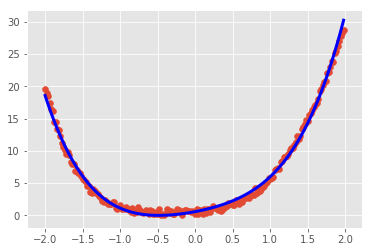

In [18]:
def polynomial(x, coefficients):
    ret = 0
    power = 1
    for i in coefficients:
        #for this loop to perform as expected, an order N polynomial must be described by an array of length N+1. 
        #Specifically, if for a 4th order polynomial, the coefficient of x^3 is zero, 
        # this must still be included as a 0 in the array and not simply dropped
        ret += i*power
        power *= x
    return(ret)

def generalised_cost_function(data, coefficients):
    cost = 0
    for i in data:
        cost += (i[1] - polynomial(i[0], coefficients))**2
    return(cost)


def generalised_wrapper(coefficients):
    return generalised_cost_function(new_data, coefficients)

#have set all coefficients=1 as the starting point for the optimisation
optim = optimize.minimize(generalised_wrapper,[1 for i in range(5)])
print optim

predictions = [polynomial(i, optim['x']) for i in new_data[:,0]]
plt.plot(new_data[:,0], predictions, linewidth=3, color = 'b')
plt.scatter(new_data[:,0], new_data[:,1])
plt.show()
        

Of course, it helps to know what you're looking for, but the same process can be used to fit any type of function (common alternatives are logarithmic, trigonometric, exponential and power laws).

#Some Common Mathematical Tricks
Consider the aforementioned case, of fitting a polynomial of order K to a set of N data points of the form $(x,y)$ with $N \gg (K+1)$. This generates N equations of the form:

$\theta_{0}+\theta_{1}x_{j}+\theta_{2}x_{j}^{2} \ldots \theta_{K-1}x_{j}^{K} \hspace{4mm} j\in [1,N]$

which can be written in matrix form:

$\begin{pmatrix}1&x_{1}&x_{1}^{2}&\ldots&x_{1}^{K} \\ 1&x_{2}&x_{2}^{2}&\ldots&x_{2}^{K} \\ \ldots &\ldots &\ldots &\ldots &\ldots \\
1&x_{N}&x_{N}^{2}&\ldots&x_{N}^{K} 
\end{pmatrix}\begin{pmatrix}\theta_{0}\\\theta_{1}\\\theta_{2}\\ \ldots \\ \theta_{K}\end{pmatrix}=\begin{pmatrix}y_{1}\\y_{2} \\ \ldots \\ y_{N}\end{pmatrix}$

or $M \cdot \underline{\theta}=\underline{y}$ in which M is an $N\times (K+1)$ matrix and thus is not invertible, because this is an over-determined set of equations. Nonetheless, the "best possible" solution of an over-determined set of equations can be found using a pseudo inverse. The definition of "best possible" comes from the algebra of vector spaces, and is defined as the $\hat{x}$ which minimises $\Sigma_{i}||\hat{x}_{i}-x||$, however in the case of a quadratic norm, this is equivalent to minimising the sum of the squares of the differences between the value predicted by regression, and those in the data. Thus the pseudo inverse solves the polynomial regression problem. The pseudo-inverse is given by $(M^{T}M)^{-1}M^{T}$ (the superscript T denoting the transpose). The derivation is as follows:

$M\cdot \underline{\theta}=\underline{y}$

$M^{T}\cdot M \cdot \underline{\theta}=M^{T}\cdot\underline{y}$

Note that $M^{T}\cdot M$ will be a square matrix. If $M$ has full rank (linearly independent rows and columns), $M^{T}$ must  also have full rank, and thus it can be shown that $M^{T}\cdot M$ will likewise have full rank. It turns out that it is only necessary for the columns of M to form a linearly independent basis in order for $M^{T}\cdot M$ to be invertible but not for its rows to do so. If there are duplicate data points, M will have duplicate rows and thus not have full row rank but this does not strictly cause a problem. 

Finally:

$\underline{\theta}=\left(M^{T}\cdot M\right)^{-1} \cdot M^{T}\cdot\underline{y}$

A further problem is that matrix inversion can be susceptible to numerical inaccuracies, especially when the entries in the original matrix and/or the determinant are small numbers. 

##Solving the previous problem using pseudo-inverses




In [15]:
power_matrix = np.matrix([[i**k for k in range(5)]for i in new_data[:,0]])

pm_trans = np.transpose(power_matrix)

prod = np.dot(pm_trans, power_matrix)

prod = np.linalg.inv(prod)

pseudo_inv = np.dot(prod,pm_trans)

print np.dot(pseudo_inv,np.array(new_data[:,1]))


[[ 0.56301352  2.18867121  1.94399388  0.23858487  1.03208742]]


The above numbers should look familiar to what you found using the standard scipy optimisation. Numpy makes the entire process easier:

In [16]:
pseudo_inv = np.linalg.pinv(power_matrix)
print np.dot(pseudo_inv, np.array(new_data[:,1]))


[[ 0.56301352  2.18867121  1.94399388  0.23858487  1.03208742]]


For more information, see: https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse

#Solution By Newton's Method
##Newton-Raphson Background
If we have a function $f(x)$ and we wish to find its zeros, we must make an initial guess $x_{0}$ and iterate from there. The general formula for finding a "better" estimate of $x^{*}$ in which $f(x^{*})=0$ is: $$x_{n+1}=x_{n}-\frac{f(x_{n})}{f'(x_{n})}$$

If instead we have two functions which depend on the same variables, say $f(x,y)$ and $g(x,y)$, then we also start by making some initial guess $(x_{0},y_{0})$ and iterate from there using the analogous formula: $$\begin{pmatrix}x_{n+1}\\y_{n+1}\end{pmatrix}=\begin{pmatrix}x_{x}\\y_{n}\end{pmatrix}-\left(\begin{pmatrix}\frac{\partial f}{\partial x}|_{x_{n},y_{n}}& \frac{\partial f}{\partial y}|_{x_{n},y_{n}}\\\frac{\partial g}{\partial x}|_{x_{n},y_{n}}&\frac{\partial g}{\partial y}|_{x_{n},y_{n}}\end{pmatrix}\right)^{-1}\cdot\begin{pmatrix}f(x_{n},y_{n})\\g(x_{n},y_{n})\end{pmatrix}$$

For more details on Newton's Method, see  https://en.wikipedia.org/wiki/Newton%27s_method

In the case of optimisation, it is the derivative that must be zero. In the case of one variable, this does not complicate things very much. We simply make our guess $x_{0}$ as before and iterate according to $$x_{n+1}=x_{n}-\frac{f'(x_{n})}{f''(x_{n})}$$

When we have two variables, we are trying to optimise $f(x,y)$ meaning $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ must be equal to zero simultaneously. Note that if f is instead a function of (x,y,z), then three functions in three variables must be stationary simultaneously, although fundamentally, this changes nothing. After making our initial guess of $(x_{0},y_{0}(,\ldots))$, we iterate according to: $$\begin{pmatrix}x_{n+1}\\y_{n+1}\end{pmatrix}=\begin{pmatrix}x_{n}\\y_{n}\end{pmatrix}- J^{-1}\cdot \begin{pmatrix}\frac{\partial f(x_{n},y_{n})}{\partial x}\\\frac{\partial f(x_{n},y_{n})}{\partial y}\end{pmatrix}$$

until convergence is achieved.

In the above, J is a jacobian matrix of sorts, but $J_{ab}=\frac{\partial ^{2} f}{\partial x_{a}\partial x_{b}}$.

##Application to Polynomial Regression
Because the cost function is quadratic in all parameters, all of its derivatives are linear in all parameters and consequently, the step in deriving the Newton-Raphson iterative scheme which approximates the cost function as a Taylor expansion to first order becomes an exact expression. This results in Newton-Raphson converging in a single iteration and it can in fact be seen that in this case, the method is equivalent to pseudo inverses. Thus using Newton-Raphson in this case is somewhat artificial, but it comes into its own in cases when the cost functions derivatives do not depend linearly on the model's parameters. 

In our current example, the derivative(s) of the cost function, whose roots we are trying to find are given by:

$\frac{\partial C}{\partial \theta_{k}}=\frac{\partial}{\partial \theta_{k}}\Sigma_{i=1}^{N}\left(f(x_{i};\underline{\theta})-y_{i}\right)^{2}=\Sigma_{i=1}^{N}2\frac{\partial f(x_{i};\underline{\theta})}{\partial \theta_{k}}\left(f(x_{i};\underline{\theta})-y_{i}\right)=\Sigma_{i=1}^{N}2x_{i}^{k}\left(f(x_{i};\underline{\theta})-y_{i}\right)$

Thus the optimisation process involves finding the roots of K+1 equations, all of which are linear in the same K+1 parameters. Furthermore, these derivatives are particularly easy to find:
$\frac{\partial ^{2}C}{\partial \theta_{j}\theta_{k}}=2\Sigma_{i=1}^{N}x_{i}^{j+k}$

Consequently, the "Jacobian" matrix which needs to be inverted is simple and symmetric. 

0.563013524028 2.1886712085 1.94399388438 0.238584871817 1.0320874205

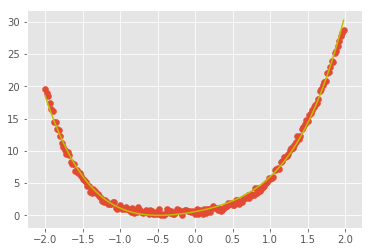

In [20]:
ORDER = 5

jacobian = [[0 for j in range(ORDER)] for i in range(ORDER)]

#First we calculate the "Jacobian" by calculating all second derivatives according to the above formula

for i in range(ORDER):
    for j in range(ORDER):
        jac=0
        for k in new_data[:,0]:
            jac+=2*(k**(i+j))
        jacobian[i][j]=jac
        
#Next we invert it using Numpy        

jacobian = np.linalg.inv(jacobian)

#Generate a random starting guess to initialise Newton-Raphson search

trial = [random.uniform(-3,3) for i in range(ORDER)]

#The final and messiest part is generating all first derivatives

trial_devs = []
for i in range(ORDER):
    cost_deriv = 0
    for j,k in enumerate(new_data[:,0]):
        cost_deriv += 2 * (k**i) * (polynomial(k,trial) - new_data[j,1])
    trial_devs.append(cost_deriv)
    
values = []

#Finally, perform the necessary matrix multiplication
    
for i in range(ORDER):
    summing = trial[i]
    for j in range(ORDER):
        summing -= jacobian[i][j]*trial_devs[j]
    print summing,
    values.append(summing)


predictions = [polynomial(i, values) for i in new_data[:,0]]

plt.plot(new_data[:,0],predictions,color='y')
plt.scatter(new_data[:,0],new_data[:,1])
plt.show()

#Connection to Pseudo-Inverses
As we are finding $\underline{\theta}$ such that $\Sigma_{i=1}^{N}x_{i}^{k}\left(f(x_{i};\underline{\theta})-y_{i}\right)=0   \hspace{3mm}\forall k$, which after rearranging gives us K+1 equations of the form:

$\Sigma_{i=1}^{N}x_{i}^{k}y_{i}=\Sigma_{i=1}^{N}x_{i}^{k}f(x_{i};\underline{\theta})$

As before we define the matrix M such that $M_{ab}=x_{a}^{b}$. Thus we re-write the above as

$\Sigma_{i=1}^{N}M_{ik}y_{i}=\Sigma_{i=1}^{N}M_{ik}\Sigma_{j=0}^{K}\theta_{j}M_{ij}$

The LHS is equal to $(M^{T}\cdot \underline{y})_{k}$. The RHS can be written (after switching the order of the summation) as $\left(M^{T}\cdot M \cdot \underline{\theta}\right)_{k}$.

Hence setting all K+1 partial derivatives of the cost function to zero simultaneously yields the Matrix equation:

$M^{T}\cdot \underline{y}=M^{T}\cdot M \cdot \underline{\theta}$ and consequently,

$\underline{\theta} = (M^{T}\cdot M)^{-1}\cdot M^{T} \cdot \underline{y}$

Thus in the case of polynomial regression, or fitting to any other function in which the derivative of the cost function is linear in all parameters, Newton-Raphson converges in a single iteration and is entirely equivalent to finding the pseudo-inverse. For the case of a function for which this is not the case (e.g. $A \sin (ax) + B \sin(bx)$), Newton's Method can be applied iteratively and is one possible way of performing the optimisation step. Nonetheless, Newton-Raphson requires a matrix inversion which can be numerically unstable and it is likely that in practice, you will use scipy's optimize or something similar.